<a href="https://colab.research.google.com/github/TAEO2474/python-dev/blob/main/401_Pandas_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9E%85%EC%B6%9C%EB%A0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

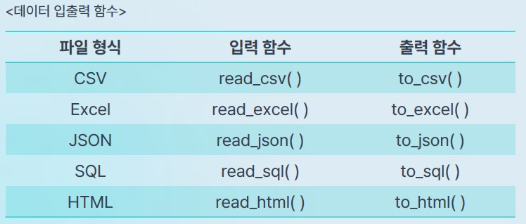

| 옵션            | 설명                                                             |
| ------------- | -------------------------------------------------------------- |
| `mode='head'` | 데이터나 출력의 **처음 일부만** 보여줍니다. 보통 상위 n개 항목(예: 처음 5개)만 출력할 때 사용됩니다. |
| `mode='tail'` | 데이터나 출력의 **마지막 일부만** 보여줍니다. 예: 마지막 5개 항목만 출력                   |
| `mode='all'`  | **전체 데이터나 로그를 모두** 출력합니다. 양이 많을 경우 성능이나 가독성에 영향을 줄 수 있음        |


In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import csv
import os

In [ ]:
# 모든 컬럼을 한 줄에 출력하도록 설정
pd.set_option('display.expand_frame_repr', False)

# 필요시 컬럼 개수도 충분히 보이도록 설정
pd.set_option('display.max_columns', None)

In [ ]:
# 1. 실제 의료용 당뇨병 데이터 불러오기
def get_diabetes_df():
  diabetes = load_diabetes()
  #print(type(diabetes))
  #print(dir(diabetes))
  #print(diabetes.DESCR)
  #print(diabetes)
  df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
  print(df)
  return df

# 2. 텍스트 파일로 저장 (기본: df.head())
def write_text_file(filename, df, m='head', num_rows=5):
  try:
    with open(filename, mode='w', encoding='utf-8') as f:
      if m == 'head':
        f.write(df.head(num_rows).to_csv(index=False))
      elif m == 'tail':
        f.write(df.tail(num_rows).to_csv(index=False))
      else:
        f.write(df.to_csv(index=False))
    print(f'[OK] 텍스틑 파일 저장 완료 -> {filename}')
  except Exception as e:
    print(f'[ERROR] 텍스트 파일 저장 중 문제 발생 : {e}')

# 3. 텍스트 파일 읽기
def read_text_file(filename, encoding='utf-8'):
  try:
    with open(filename, mode='r', encoding=encoding) as f:
      content = f.read()
      print(f'[읽기 완료] {filename} 내용:\n', content)
      return content
  except FileNotFoundError:
    print(f'[ERROR] 파일 없음: {filename}')
  except Exception as e:
    print(f'[ERROR] 텍스트 파일 읽기 중 문제 발생: {e}')

# 4. 엑셀 파일 저장하기
def write_excel_file(df, filename):
  try:
    df.to_excel(filename,  index=False)
    print(f'[OK] 엑셀 파일 저장 완료 -> {filename}')
  except Exception as e:
    print(f'[ERROR] 엑셀 저장 오류: {e}')

# 5. 엑셀 파일 읽어오기
def read_excel_file(filename):
  try:
    df = pd.read_excel(filename)
    print(f'[읽기완료] {filename} (상위 5개):\n', df.head())
  except FileNotFoundError:
    print(f'[ERROR] 파일 없음: {filename}')
  except Exception as e:
    print(f'[ERROR] 엑셀 파일 읽기 실패: {e}')

In [ ]:
if __name__ == '__main__':
  # 1. 데이터 가져오기
  df = get_diabetes_df()

  # 2. 텍스트 파일로 저장
  write_text_file('diabetes_tail.txt',df, 'tail', num_rows=10 )

  # 3. 텍스트 파일 읽기
  read_text_file('diabetes_tail.txt')

  # 4. 엑셀 파일 저장하기
  write_excel_file(df, 'diabetes_data.xlsx')

  # 5. 엑셀 파일 읽어오기
  read_excel_file('diabetes_data.xlsx')

          age       sex       bmi        bp        s1        s2        s3        s4        s5        s6
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592  0.019907 -0.017646
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493 -0.068332 -0.092204
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592  0.002861 -0.025930
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309  0.022688 -0.009362
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592 -0.031988 -0.046641
..        ...       ...       ...       ...       ...       ...       ...       ...       ...       ...
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674 -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674  0.034309 -0.018114  0.044485
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 